In [2]:
import numpy as np
import matplotlib.pyplot as plt

PROMEDIO   = 'promedio'
DEV_STD    = 'desviacion_estandar'
COVARIANZA = 'covarainza'
DET_COV    = 'det_covarianza'
INV_COV    = 'inv_covarianza'
PRIORI     = 'priori'


# Entrenamiento

Obtener los vectores de características de cada clase

In [3]:
def getTrainData(elemento: str):
  data = []
  
  for numEntrenamiento in range(1,5):
    img = plt.imread(r'./mascaras_v2/Entrenamiento'+str(numEntrenamiento)+r'/'+elemento+r'.png')
    
    for x  in range(img.shape[0]):
      for y  in range(img.shape[1]):
        # np.append(data,[img[x,y,0],img[x,y,1],img[x,y,2]])
        if(img[x,y,0] and img[x,y,1] and img[x,y,2]):
          data.append([img[x,y,0],img[x,y,1],img[x,y,2]])
        
  
  return np.array(data)

In [4]:
fondo   = getTrainData('fondo')
chiles  = getTrainData('chile')
platano = getTrainData('platano')
huevo   = getTrainData('huevo') 

In [5]:
def getStatistics(data: np.ndarray, total: float):
  promedio    = data.mean(axis=0)
  cov         = np.cov(data.T)
  desv_std    = np.std(data)
  cov_det     = np.linalg.det(cov)
  cov_inv     = np.linalg.inv(cov)
  prob_priori = data.size / total
  
  return {
    PROMEDIO : promedio,
    COVARIANZA: cov,
    DEV_STD: desv_std,
    DET_COV: cov_det,
    INV_COV: cov_inv,
    PRIORI: prob_priori    
  }
  
  
def showStatistics(stats: dict)->None:
  print('~'*23);print(PROMEDIO);print('-'*23);print(stats[PROMEDIO])
  print('~'*23);print(COVARIANZA);print('-'*23);print(stats[COVARIANZA])
  print('~'*23);print(DEV_STD);print('-'*23);print(stats[DEV_STD])
  print('~'*23);print(DET_COV);print('-'*23);print(stats[DET_COV])
  print('~'*23);print(INV_COV);print('-'*23);print(stats[INV_COV])
  print('~'*23);print(PRIORI);print('-'*23);print(stats[PRIORI])

In [6]:
total = fondo.size + chiles.size + platano.size + huevo.size

huevo_stats = getStatistics(huevo,total)
fondo_stats = getStatistics(fondo,total)
chiles_stats = getStatistics(chiles,total)
platano_stats = getStatistics(platano,total)



In [7]:
print("#"*10,"HUEVO","#"*10)
showStatistics(huevo_stats)
print("#"*10,"FONDO","#"*10)
showStatistics(fondo_stats)
print("#"*10,"CHILE","#"*10)
showStatistics(chiles_stats)
print("#"*10,"PLATANO","#"*10)
showStatistics(platano_stats)

########## HUEVO ##########
~~~~~~~~~~~~~~~~~~~~~~~
promedio
-----------------------
[0.8974519  0.86841416 0.8670755 ]
~~~~~~~~~~~~~~~~~~~~~~~
covarainza
-----------------------
[[0.0021644  0.00495047 0.00559715]
 [0.00495047 0.01557487 0.01753075]
 [0.00559715 0.01753075 0.02035857]]
~~~~~~~~~~~~~~~~~~~~~~~
desviacion_estandar
-----------------------
0.11356149
~~~~~~~~~~~~~~~~~~~~~~~
det_covarianza
-----------------------
5.7544378890157905e-09
~~~~~~~~~~~~~~~~~~~~~~~
inv_covarianza
-----------------------
[[ 1695.22084848  -462.64926611   -67.67728687]
 [ -462.64926611  2213.24250934 -1778.62562976]
 [  -67.67728687 -1778.62562976  1599.298573  ]]
~~~~~~~~~~~~~~~~~~~~~~~
priori
-----------------------
0.07991064413812475
########## FONDO ##########
~~~~~~~~~~~~~~~~~~~~~~~
promedio
-----------------------
[0.86127484 0.36262786 0.24493943]
~~~~~~~~~~~~~~~~~~~~~~~
covarainza
-----------------------
[[0.00437929 0.00213847 0.00202018]
 [0.00213847 0.00252231 0.00160731]
 [0.00202018 

In [8]:

class ClasificadorBayes:
  # huevo: dict
  # chile: dict
  # fondo: dict
  # platano: dict
  
  HUEVO_CLAVE   = 'huevo'
  CHILE_CLAVE   = 'chile'
  FONDO_CLAVE   = 'fondo'
  PLATANO_CLAVE = 'platano'
  
  def __init__(self, huevo_st, chile_st, fondo_st, platano_st ) -> None:
    self.huevo = huevo_st
    self.chile = chile_st
    self.platano = platano_st
    self.fondo = fondo_st
    
  def getBayes(self,vector,stats: dict) -> float:
    return ((-1./2.) * np.dot((vector - stats[PROMEDIO].T) @ stats[INV_COV] , (vector - stats[PROMEDIO]))) - ((1./2.) * np.log(stats[DET_COV])) + (np.log(stats[PRIORI]))
    
  def getClass(self,vector):
    bayes = {
    self.HUEVO_CLAVE   : self.getBayes(vector,self.huevo),
    self.CHILE_CLAVE   : self.getBayes(vector,self.chile),
    self.FONDO_CLAVE   : self.getBayes(vector,self.fondo),
    self.PLATANO_CLAVE : self.getBayes(vector,self.platano)
    }
    
    return max(bayes, key=bayes.get)

In [9]:
bayes = ClasificadorBayes(huevo_stats,chiles_stats,fondo_stats,platano_stats)

In [10]:
colorDict = {
  'huevo': [1.0,1.0,1.0],
  'chile': [1.0,0.0,0.0],
  'fondo': [0.0,0.0,0.0],
  'platano': [0.0,1.0,0.0]
}

cl = bayes.getClass([0.9,.9,.2])
color = colorDict[cl]
print(cl,color)

platano [0.0, 1.0, 0.0]


In [28]:


def evaluarImagen(imagen:str,clasificador: ClasificadorBayes) -> np.ndarray:
  img = plt.imread(imagen) #(600,600,3)
  resultado = np.zeros(img.shape)
  
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      clase = clasificador.getClass([img[x,y,0]/255,img[x,y,1]/255,img[x,y,2]/255])
      color = colorDict[clase]
      resultado[x,y] = color
      # resultado[x,y,0] = color[0]
      # resultado[x,y,1] = color[1]
      # resultado[x,y,2] = color[2]
  
  return resultado
    

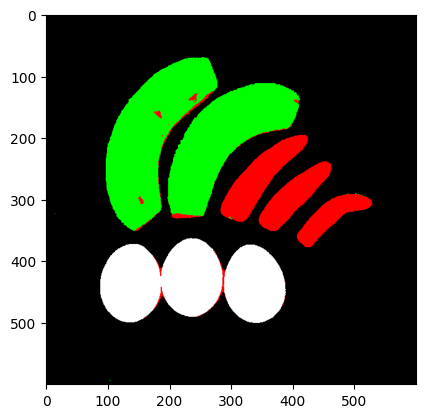

In [29]:
prueba = evaluarImagen('./comida/Prueba1.jpg',bayes)
plt.imshow(prueba)

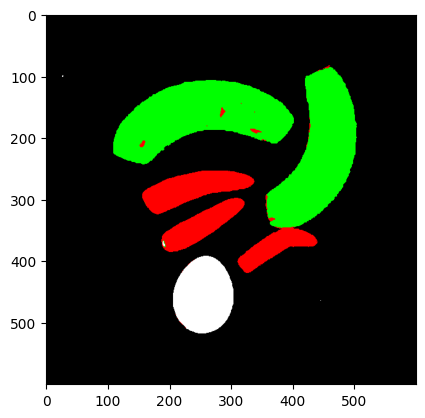

In [13]:
prueba = evaluarImagen('./comida/Prueba2.jpg',bayes)
plt.imshow(prueba)

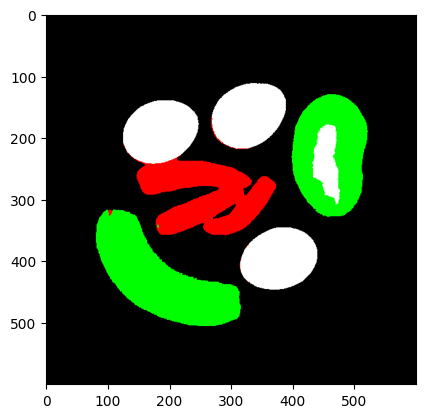

In [14]:
prueba = evaluarImagen('./comida/Prueba3.jpg',bayes)
plt.imshow(prueba)

In [69]:
from sklearn.naive_bayes import GaussianNB


train_data = np.append(chiles,platano,0)
train_data = np.append(train_data,huevo,0)
train_data = np.append(train_data,fondo,0)

train_labels = np.zeros(train_data.shape[0])
labels = ['chile','platano','huevo','fondo']

# 0 chile
# 1 platano
# 2 huevo
# 3 fondo
train_labels[chiles.shape[0]:chiles.shape[0]+platano.shape[0]] = 1
train_labels[chiles.shape[0]+platano.shape[0] :chiles.shape[0]+platano.shape[0]+huevo.shape[0]] = 2
train_labels[chiles.shape[0]+platano.shape[0]+huevo.shape[0]:-1] = 3


gnb = GaussianNB()

gnb.fit(train_data,train_labels)



GaussianNB()

In [79]:
gnb.predict([[1,1,1]])

array([2.])

In [82]:

def prueba2():
  img = plt.imread('comida/Prueba1.jpg')
  img = img/255
#   colorDict = {
#   'huevo': [1.0,1.0,1.0],
#   'chile': [1.0,0.0,0.0],
#   'fondo': [0.0,0.0,0.0],
#   'platano': [0.0,1.0,0.0]
# }
  res = np.zeros(shape=img.shape)
  color = [[1.0,1.0,1.0],[1.0,0.0,0.0],[0.0,0.0,0.0],[0.0,1.0,0.0]]
  
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      res[x,y] = color[int(gnb.predict([[img[x,y,0],img[x,y,1],img[x,y,2]]])[0])]
      
  return res



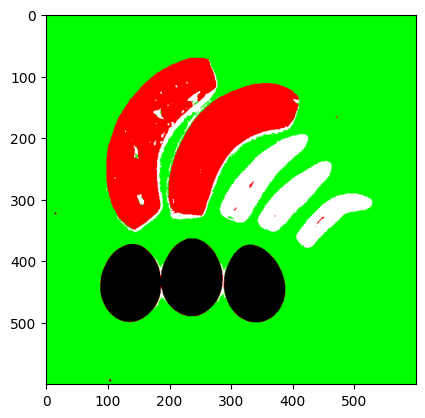

In [83]:
pr = prueba2()
plt.imshow(pr)